In [1]:
from packages import *

# Torsionsweicher Träggerrost

Das folgende Beispiel ist aus @marti_baustatik_2014 entnommen. Dieses dient als einführendes Beispiel in die Modellierung von Trägerrosten mit dem Federmodell. In der @fig-marti_rost_gr ist der Grundriss des Trägerrosts dargestellt. Es handelt sich um insgesamt 16 torsionsweiche Stäbe, welche an den Enden eingespannt sind.

![Grundriss des torsionsweichen Trägerrosts](../imgs/marti_traegerrost_gr.png){#fig-marti_rost_gr}

Im Beispiel wird eine analytische Lösung zur Traglast aufgezeigt. Das Ziel ist es, mittels dem Federmodell eine numerische Lösung des unteren Grenzwerts der Traglast zu erhalten.






## Analytische Lösung

Die Analytische Lösung basiert auf dem Traglastverfahren. Mittels einem zulässigen Mechanismus wird ein oberer Grenzwert der Traglast hergeleitet. In der @fig-marti_mechanismus sind zwei Stäbe dargestellt. Aus symmetriegründen lässt sich der obere Grenzwert des gesamten Trägerrosts anhand dieser Darstellung ermitteln.

![Mechanismus eines Stabs des Trägerrosts](../imgs/marti_traegerrost_mechanismus.png){#fig-marti_mechanismus}



Die äussere Arbeit $W_a$ des dargestellten Systems in @fig-marti_mechanismus beträgt dabei für die am Rand gelegenen Stäbe (Punkte 2'45):

$$
W_{a,2'45} = 4 \cdot \left( Q \cdot \frac{1}{3} + Q \cdot \frac{1}{9} \right)
$$

Und für die Innenträger:

$$
W_{a,123} = 4 \cdot \left( Q \cdot 1 + Q \cdot \frac{1}{3} \right)
$$


Sowie beträgt die innere Arbeit:

$$
W_i = 8 \cdot \left(M_u' + M_u\right) \cdot \left(\frac{1}{3l} +\frac{1}{9l}\right)
$$

Durch das abschliessende Gleichsetzen der Arbeiten und das Lösen nach $Q$ folgt der obere Grenzwert der Traglast zu:

$$
Q = \frac{M_u + M_u'}{2l}
$$

Die Plastizitätskontrolle ist in der @fig-marti_plastizitaetskontrolle gezeigt. Dabei wird eine Lastverteilung von je einer Hälfte $Q$ in $x$ und $y$ Richtung angenommen.

![Plastizitätskontrolle anhand der Schnittgrössen](../imgs/marti_traegerrost_schnittgroessen.png){#fig-marti_plastizitaetskontrolle}

Aus der Plastizitätskontrolle geht heraus, dass der Biegewiderstand nirgends überschritten wird, somit deckt sich der untere und obere Grenzwert der Traglast, sprich die Traglast $Q_u$ wurde gefunden.


$$
Q_u = \frac{M_u + M_u'}{2l}
$$



## Numerische Lösung

Abschliessend wird die analytische Lösung mit der numerischen Lösung verglichen. Dabei wird ein Federmodell erstellt.
Zunächst sind die Variablen mit numerischen Werten zu substituieren:

In [2]:
l = 1*m 
M_u = 100*kN*m
M_apos_u = 100*kN*m

Q_u = 0.5*(M_u + M_apos_u) /l

put_out()

$$
\begin{aligned}
l & = 1 \ \mathrm{m} \quad & M_{u} & = 100 \ \mathrm{kN} \cdot \mathrm{m} \quad & M'_{u} & = 100 \ \mathrm{kN} \cdot \mathrm{m} \\ 
Q_{u} & = 100.0 \ \mathrm{kN} \quad &  \quad &  
 \end{aligned}
$$

Der Trägerrost wurde mittels dem Federmodell nachmodelliert. Dabei sind biegestarre, jedoch torsionsweiche Stäbe mittels Stabendgelenken gekoppelt. Dargestellt in der @fig-AxisVM_marti_geom.

![Statisches Modell in AxisVM des Trägerrosts](../imgs/traegerrost%20_system.svg){#fig-fem_marti_geom}

![Gelenkdefinition in AxisVM des Trägerrosts](../imgs/marti_fem_gelenk.png){#fig-AxisVM_marti_gelenk}

Den Gelenken wurde die Defintion gemäss @fig-AxisVM_marti_gelenk hinterlegt. Dabei wurde der Biegewiderstand in positiver und negativer Dimension angesetzt, ab dem Erreichen des Biegewiderstands fliesst das Gelenk. Dies führt dazu, dass sich die Biegemomente umlagern, sprich der Biegewiderstand auch in Trägermitte erreicht werden kann.

![Biegemomente des Trägerrosts bei einer Belastung von 58 kN, erste plastische Gelenke entstehen bei der Lagerung der Innenträger](../imgs/my_traegerrost_58.svg){#fig-AxisVM_marti_res_58}

![Biegemomente des Trägerrosts bei einer Belastung von 88 kN, plastische Gelenke entstehen bei der Lagerung der Aussenträger](../imgs/my_traegerrost_88.svg){#fig-AxisVM_marti_res_88}

![Biegemomente des Trägerrosts bei einer Belastung von 94 kN, plastische Gelenke entstehen im Feld der Innenträger](../imgs/my_traegerrost_94.svg){#fig-AxisVM_marti_res_94}

![Biegemomente des Trägerrosts bei einer Belastung von 100 kN, plastische Gelenke entstehen im Feld der Aussenträger](../imgs/my_traegerrost_100.svg){#fig-AxisVM_marti_res_100}

Mit der Belastung aus dem unteren Grenzwert stellen sich exakt die Extremwerte der Biegemomente $M_u$ und $M'_u$ in den innen liegenden Stäben ein. Das Federmodell liefert den exakten unteren Grenzwert der Traglast. Dargestell in der @fig-AxisVM_marti_res.

# Torsionsteifer Trägerrost

In [3]:
Q_lower_comma_tors = 1.206 * Q_u

put_out()

$$
\begin{aligned}
Q_{lower , tors} & = 120.6 \ \mathrm{kN} \end{aligned}
$$

In [4]:
def kreisgleichung(x, y):
    return np.sqrt(x**2+y**2)

In [5]:
LS1_P3 = kreisgleichung(99.82, 2.63)
LS2_P5 = kreisgleichung(98.5, 19.9)
LS2_P1 = kreisgleichung(100,7)
P5 = kreisgleichung(60, 30)

put_out()

$$
\begin{aligned}
LS_{1 P3} & = 99.85 \quad & LS_{2 P5} & = 100.49 \quad & LS_{2 P1} & = 100.24 \\ 
P_{5} & = 67.08 \quad &  \quad &  
 \end{aligned}
$$

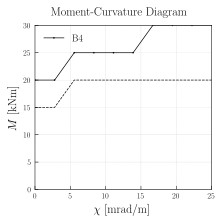

In [6]:
import matplotlib.pyplot as plt
import numpy as np


# Dummy data to illustrate the style
x = np.linspace(0, 25, 10)
y1 = np.piecewise(x, [x < 5, (x >= 5) & (x < 15), x >= 15], [lambda x: 20, lambda x: 25, lambda x: 30])
y2 = np.piecewise(x, [x < 5, x >= 5], [lambda x: 15, lambda x: 20])

# Create a figure with a larger size to accommodate labels, but not the plotting area
fig, ax = plt.subplots(figsize=(8/2.54, 8/2.54))  # Slightly larger figure size (e.g., 8 cm x 8 cm)

# # Define the position of the axes to ensure the plot area is exactly 6 cm x 6 cm
# left = 1.5 / 8  # Left margin as a fraction of figure width (1.5 cm)
# bottom = 1.5 / 8  # Bottom margin as a fraction of figure height (1.5 cm)
# right = (8 - 7.5) / 8  # Right margin as a fraction (figure size - plot width)
# top = (8 - 7.5) / 8  # Top margin as a fraction

# # Set position with [left, bottom, width, height] and convert it to relative terms
# ax.set_position([left, bottom, 6 / 8, 6 / 8])  # Ensure that the width and height of the axes are exactly 6 cm

# Plot the two lines with markers
ax.plot(x, y1, linestyle="-", marker="x", label=r"B4", color="k")
ax.plot(x, y2, linestyle="--", color="k")

# Set axis labels
ax.set_xlabel(r'$\chi$ [mrad/m]', fontsize=12)
ax.set_ylabel(r'$M$ [kNm]', fontsize=12)


# Add title
ax.set_title('Moment-Curvature Diagram', fontsize=12)

# Set limits
ax.set_xlim([0, 25])
ax.set_ylim([0, 30])

# Add legend
ax.legend(loc="upper left", fontsize=10)

# Show the plot
plt.tight_layout()
plt.savefig('imgs/test.svg')
plt.savefig('imgs/test2.svg')
plt.show()
plt.close()


::: {#fig-elephants layout-ncol=2}

![Surus](../imgs/test.svg){#fig-surus}

![Hanno](../imgs/test2.svg){#fig-hanno}

Famous Elephants
:::